**LABORATORIO FINAL**

*PARTE 2*

PRESENTADO POR:

*Laura Sofía Mosquera Gruezo*

*María Celeste Isaza Vergara*


In [232]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler



1. IMPLEMENTAR EL PERCEPTRON SIMPLE DEL PROBLEMA VISTO EN CLASE USANDO SKLEARN

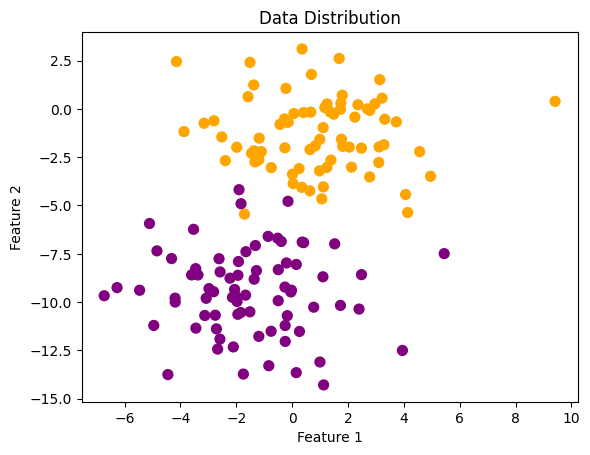

In [233]:
X, y = datasets.make_blobs(
    n_samples=150,
    n_features=2,
    centers=2,
    cluster_std=2.05,
    random_state=2
)
colors = ['purple', 'orange']
plt.scatter(X[:, 0], X[:, 1], c=[colors[label] for label in y], s=50)
plt.title("Data Distribution")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [234]:
scaler = StandardScaler()
Xs = scaler.fit_transform(X)


In [235]:
perceptron = Perceptron( warm_start=True, random_state=42, eta0=0.0001)
perceptron.fit(X, y)

,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,eta0,0.0001
,n_jobs,None
,random_state,42


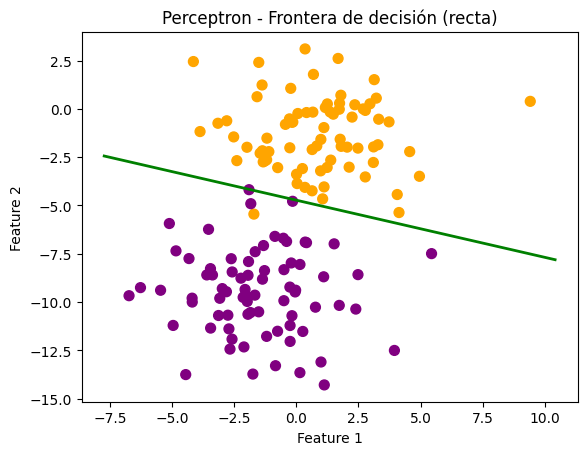

In [236]:
# 3. Graficar los puntos
colors = ['purple', 'orange']
plt.scatter(X[:, 0], X[:, 1], c=[colors[label] for label in y], s=50)

# 4. Graficar la frontera de decisión como recta
w = perceptron.coef_[0]      # pesos [w1, w2]
b = perceptron.intercept_[0] # sesgo

# Ecuación: w1*x1 + w2*x2 + b = 0
# => x2 = -(w1/w2)*x1 - b/w2
x_vals = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 200)
y_vals = -(w[0]/w[1]) * x_vals - b/w[1]

plt.plot(x_vals, y_vals, color='green', linewidth=2)

plt.title("Perceptron - Frontera de decisión (recta)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

2. REPORTE LOS PESOS W, EL BIAS Y EL LOS COSTOS

In [237]:
epochs = 300   
costos = []
pesos = []
biases = []
accuracies = []

for epoch in range(1, epochs + 1):
        perceptron.fit(X, y)
        y_pred = perceptron.predict(X)
        

        errores = np.sum(y_pred != y)
        costo = errores
        costos.append(costo)
        acc = accuracy_score(y, y_pred)
        accuracies.append(acc)

        
        # Guardar pesos y bias
        pesos.append(perceptron.coef_[0].copy())
        biases.append(perceptron.intercept_[0])

        
        print(f"Época {epoch:2d} | W: {perceptron.coef_[0]} | b: {perceptron.intercept_[0]} | Costo: {costo:.4f}")


Época  1 | W: [0.00059887 0.00145401] | b: 0.004299999999999998 | Costo: 14.0000
Época  2 | W: [0.00035809 0.00119516] | b: 0.005300000000000001 | Costo: 1.0000
Época  3 | W: [0.00038431 0.00111611] | b: 0.005800000000000002 | Costo: 3.0000
Época  4 | W: [0.00057992 0.00220294] | b: 0.006100000000000003 | Costo: 17.0000
Época  5 | W: [0.00055363 0.00143377] | b: 0.006500000000000004 | Costo: 1.0000
Época  6 | W: [0.0004363  0.00227684] | b: 0.006500000000000004 | Costo: 17.0000
Época  7 | W: [0.00090492 0.00159115] | b: 0.006900000000000005 | Costo: 1.0000
Época  8 | W: [0.00035384 0.00158647] | b: 0.007100000000000006 | Costo: 1.0000
Época  9 | W: [0.00086286 0.00158663] | b: 0.007100000000000006 | Costo: 1.0000
Época 10 | W: [0.00047009 0.00163398] | b: 0.007200000000000006 | Costo: 1.0000
Época 11 | W: [0.00085814 0.00162157] | b: 0.007200000000000006 | Costo: 1.0000
Época 12 | W: [0.00069165 0.00170059] | b: 0.007300000000000006 | Costo: 1.0000
Época 13 | W: [0.00039455 0.00240548]

3. GRAFIQUE LOS COSTOS VS LAS EPOCHS 

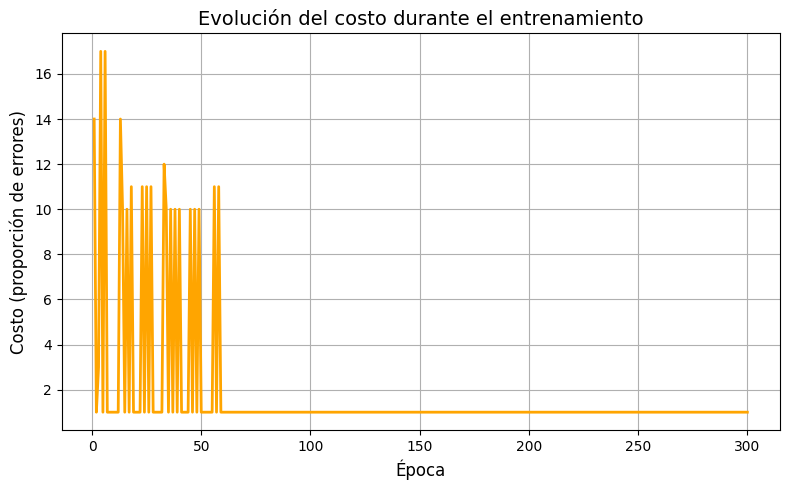

In [238]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs + 1), costos, color='orange', linewidth=2)
plt.title("Evolución del costo durante el entrenamiento", fontsize=14)
plt.xlabel("Época", fontsize=12)
plt.ylabel("Costo (proporción de errores)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


4. GRAFIQUE EL ACCURACY VS LAS EPOCHS

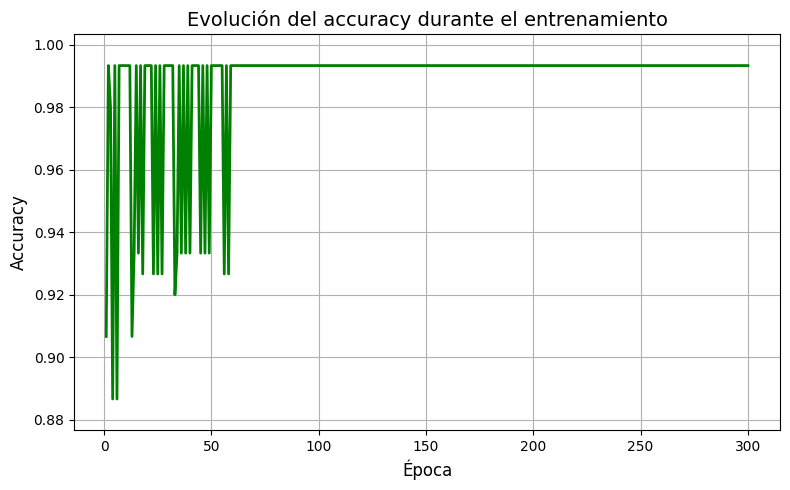

In [239]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs + 1), accuracies, color='green', linewidth=2)
plt.title("Evolución del accuracy durante el entrenamiento", fontsize=14)
plt.xlabel("Época", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(min(accuracies) - 0.01, max(accuracies) + 0.01)  # escala dinámica
plt.grid(True)
plt.tight_layout()
plt.show()

6. PRESENTE LAS METRICAS DE CLASIFICACION CON SU RESPECTIVA INTERPRETACION (ACCURACY, F1-SCORE, MATRIZ DE CONFUSION, SENSIBILIDAD Y ESPECIFICIDAD).

In [240]:
# Calcular métricas
accuracy = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
cm = confusion_matrix(y, y_pred)

tn, fp, fn, tp = cm.ravel()
sensibilidad = tp / (tp + fn)
especificidad = tn / (tn + fp)

# Mostrar resultados
print("MÉTRICAS DE CLASIFICACIÓN")
print(f"Accuracy      : {accuracy:.4f}")
print(f"F1-Score      : {f1:.4f}")
print(f"Sensibilidad  : {sensibilidad:.4f}")
print(f"Especificidad : {especificidad:.4f}")
print("\nMatriz de Confusión:")
print(cm)

MÉTRICAS DE CLASIFICACIÓN
Accuracy      : 0.9933
F1-Score      : 0.9933
Sensibilidad  : 0.9867
Especificidad : 1.0000

Matriz de Confusión:
[[75  0]
 [ 1 74]]


7. SIMULE UNA MUESTRA NUEVA (COMO SI FUESE UN PACIENTE NUEVO) Y HAGA LA CLASIFICACION DE ES PACIENTE CON EL ALGORITMO ENTRENADO

In [241]:
paciente_nuevo = np.array([[2.5, -6.3]])   

# Clasificación con el modelo entrenado
prediccion = perceptron.predict(paciente_nuevo)

print("Paciente:", paciente_nuevo)
print("Clase:", prediccion[0])


Paciente: [[ 2.5 -6.3]]
Clase: 0
